## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('scrapy/vlrgg/playerData/vlr.csv')
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))
data['playerHS'] = data['playerHS'].apply(lambda x: float(str(x).split('%')[0]))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140356 entries, 0 to 140355
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   playerName        140355 non-null  object        
 1   playerTeam        140316 non-null  object        
 2   map               140356 non-null  object        
 3   playerAgent       140356 non-null  object        
 4   playerKills       140350 non-null  float64       
 5   playerDeaths      140350 non-null  float64       
 6   playerAssists     140350 non-null  float64       
 7   playerACS         140167 non-null  float64       
 8   playerADR         140097 non-null  float64       
 9   playerHS          140177 non-null  float64       
 10  playerFirstBlood  140177 non-null  float64       
 11  playerFirstDeath  140107 non-null  float64       
 12  matchID           140356 non-null  object        
 13  gameID            140356 non-null  object        
 14  oppo

# Data Exploration

## Agent pick rate over time

In [4]:
data.columns

Index(['playerName', 'playerTeam', 'map', 'playerAgent', 'playerKills',
       'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS',
       'playerFirstBlood', 'playerFirstDeath', 'matchID', 'gameID', 'opponent',
       'result', 'winnerRoundsWon', 'loserRoundsWon', 'winningTeam', 'date',
       'event'],
      dtype='object')

In [5]:

sorted_events = data.sort_values('date')['event'].unique()

In [100]:
#agent pick rate over time
agentdata = data.groupby(['event'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentdata = agentdata.reindex(sorted_events)
agentdata.head()

playerAgent,astra,breach,brimstone,cypher,jett,kayo,killjoy,omen,phoenix,raze,reyna,sage,skye,sova,viper,yoru
event,,,,,,,,,,,,,,,,
Champions Tour LATAM Stage 1: Challengers 1,0.0,4.570792,6.131550,12.486065,15.719064,0.0,6.243032,13.935340,4.347826,12.709030,3.455964,3.344482,0.334448,16.722408,0.000000,0.000000
Champions Tour Brazil Stage 1: Challengers 1,0.0,1.551724,3.103448,9.482759,13.620690,0.0,10.000000,16.896552,2.241379,15.862069,4.482759,3.793103,0.172414,18.793103,0.000000,0.000000
Champions Tour North America Stage 1: Challengers 1,0.0,2.418301,3.333333,11.601307,16.209150,0.0,7.254902,16.470588,6.699346,8.235294,6.339869,2.647059,1.535948,16.307190,0.620915,0.326797
Champions Tour Thailand Stage 1: Challengers 1,0.0,10.714286,5.000000,10.357143,14.642857,0.0,9.642857,14.285714,3.928571,10.357143,4.285714,2.142857,0.000000,13.928571,0.714286,0.000000
Champions Tour Malaysia & Singapore Stage 1: Challengers 1,0.0,3.833333,7.500000,7.666667,15.333333,0.0,10.166667,11.833333,2.500000,11.666667,7.166667,3.833333,0.333333,17.166667,1.000000,0.000000


<AxesSubplot:xlabel='event'>

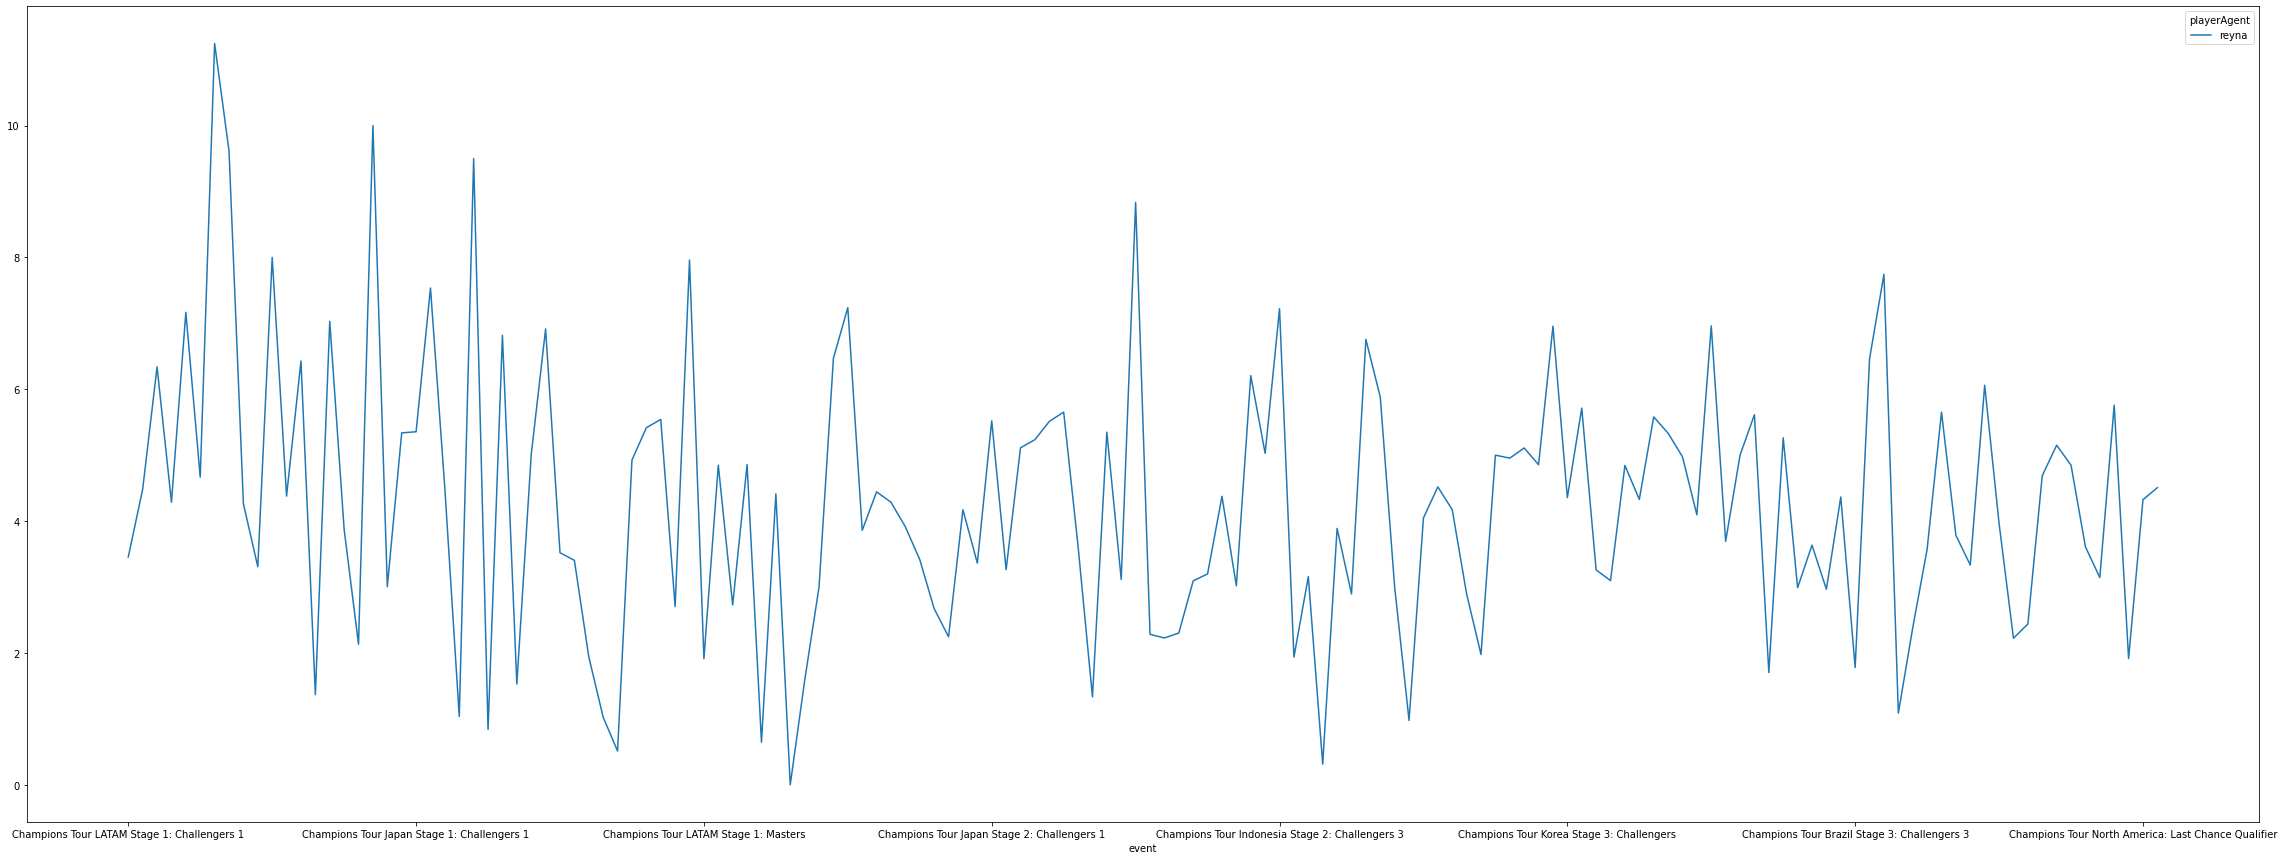

In [39]:
agentdata.plot(figsize=(40,15), y=['reyna'])
#plt.xticks(ticks=range(0,len(agentdata.index)),labels=agentdata.index.tolist(), rotation=45)
#not all events labeled in the X axis, uncomment above to see all labels

In [135]:
#finding top 5 most played agents for each map in each stage
#see win rates of teams that have 5,4,3,2,1, and 0 agents from the top 5 in that stage
#jan-april stage 1
#april-july stage2
#august-nov stage3
#december campions
data['stage']='unsorted'
data.loc[data['date'].between('2020-10-01','2021-03-01', inclusive=True), 'stage']='stage1'
data.loc[data['date'].between('2021-03-01','2021-08-01', inclusive=False), 'stage']='stage2'
data.loc[data['date'].between('2021-08-01','2021-10-15', inclusive=True), 'stage']='stage3'
data.loc[data['date'].between('2021-10-16','2021-12-15', inclusive=False), 'stage']='champions'

data.head()


,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,playerHS,...,matchID,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event,stage
0,stax,VS,Haven,breach,22.0,11.0,5.0,262.0,157.0,53.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
1,Rb,VS,Haven,skye,13.0,10.0,7.0,212.0,158.0,33.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
2,k1Ng,VS,Haven,killjoy,13.0,13.0,3.0,212.0,158.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
3,MaKo,VS,Haven,astra,13.0,8.0,6.0,209.0,154.0,24.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions
4,BuZz,VS,Haven,jett,14.0,12.0,6.0,206.0,152.0,38.0,...,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,2021-12-01,VALORANT Champions,champions


In [136]:
agentpickrate = data.groupby(['stage', 'map'])['playerAgent'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
agentpickrate

playerAgent             astra     breach  brimstone     cypher       jett  \
stage     map                                                               
champions Ascent    19.444444   0.000000   0.000000   4.444444  18.888889   
          Bind      16.153846   0.000000   3.846154   0.000000   9.230769   
          Breeze     0.000000   0.000000   0.476190  12.857143  20.000000   
          Fracture  15.000000  20.000000   3.333333  13.333333  11.666667   
          Haven     19.444444   7.777778   0.000000   6.666667  18.888889   
          Icebox     0.000000   0.000000   0.000000   0.000000  20.000000   
          Split     17.647059   6.470588   0.000000   7.058824  10.000000   
stage1    Ascent     0.000000   5.224430   2.449280   6.527909  16.966257   
          Bind       0.000000   5.221583   8.595528  13.817111  11.942696   
          Haven      0.000000   5.624391   2.547682  13.128219  16.678268   
          Icebox     0.000000   0.993172   1.427685   1.862197  17.163253   
          Split      0.000000  11.621053   3.031579   9.136842  13.473684   
stage2    Ascent     6.145316   3.145816   0.720034   4.943976  15.301683   
          Bind       5.295549   3.124851   6.874672   8.587377   8.740041   
          Breeze     0.881191   0.546946   0.516560   9.662716  18.170769   
          Haven      6.112930   3.989283   0.937779  11.675102  15.565148   
          Icebox     0.400816   0.371666   0.204052   0.685031  17.599475   
          Split      6.230872   8.396767   1.428235   9.008868  10.570509   
stage3    Ascent    13.339686   1.572177   0.095283   3.668414  17.865650   
          Bind      10.246496   3.044949   7.104882   1.836636   8.023200   
          Breeze     0.661001   0.094429   0.472144  12.559018  19.357885   
          Haven     12.994350   3.502825   0.282486   8.700565  19.039548   
          Icebox     0.182927   0.487805   0.060976   0.304878  19.512195   
          Split     13.877551   5.510204   0.748299   6.870748  11.904762   
unsorted  Ascent    20.000000   0.000000   0.000000   5.000000  20.000000   
          Bind      20.000000   2.500000   0.000000   0.000000  12.500000   
          Haven     10.000000   0.000000   0.000000  10.000000  13.333333   
          Icebox     3.333333   3.333333   0.000000   0.000000  16.666667   
          Split     20.000000   0.000000   0.000000  10.000000  10.000000   

playerAgent             kayo    killjoy       omen   phoenix       raze  \
stage     map                                                             
champions Ascent    5.555556  15.000000   0.555556  0.000000   0.555556   
          Bind      3.076923   0.769231   0.000000  0.000000  11.538462   
          Breeze    7.142857   5.238095   0.000000  0.000000   0.000000   
          Fracture  1.666667   6.666667   0.000000  0.000000  10.000000   
          Haven     1.111111  13.333333   0.555556  1.111111   1.666667   
          Icebox    1.666667   4.444444   0.000000  0.000000   2.777778   
          Split     1.176471   8.235294   2.352941  0.000000  14.117647   
stage1    Ascent    0.000000  12.330495  17.523389  3.058972   5.834122   
          Bind      0.000000   3.909493  11.259874  4.163877  15.410363   
          Haven     0.000000   5.429486  17.402200  6.404009   6.738132   
          Icebox    0.000000  12.538796  10.924891  0.806952   6.952204   
          Split     0.000000   9.368421  16.842105  1.094737  16.631579   
stage2    Ascent    0.812445  13.411112  13.099226  3.627123   5.868084   
          Bind      0.639282   3.683030   7.561662  2.337675  15.543152   
          Breeze    0.273473   2.765117   1.731996  0.364631   0.151930   
          Haven     0.898085   7.055671  12.950283  4.976680   5.934306   
          Icebox    0.320653   8.810669   4.066463  0.255065   4.132051   
          Split     0.745507   8.969630  12.069371  0.400220  15.914620   
stage3    Ascent    2.239162  14.244879   6.717485  2.477370   2.906146   
          Bind      1.788304   2.6582